



**In this project, the Sumy library is used for text summarization. These summarizers are utilized to automatically condense the content of articles into shorter summaries, which can be useful for extracting key information and reducing the length of text while retaining its essential meaning.**

**Four different summarization methods from Sumy are employed:**

* **KLSummarizer:** Implements the Kullback-Leibler Summarizer, which uses the concept of information divergence for summarization.

* **LsaSummarizer:** Implements Latent Semantic Analysis (LSA) for summarization, which uses singular value decomposition (SVD) to identify the underlying structure in the data.

* **LuhnSummarizer:** Implements the Luhn Summarizer, which focuses on identifying and extracting the most relevant sentences based on the frequency of significant words.

* **LexRankSummarizer:** Implements the LexRank algorithm, which applies the concept of eigenvector centrality from graph theory to identify important sentences in a document.



In [288]:
import os
import numpy as np
import pandas as pd
import neattext as nt
from tqdm import tqdm
from colorama import Fore
import neattext.functions as nf
import matplotlib.pyplot as plt
from IPython.display import Image,display

from nltk import word_tokenize
from nltk.corpus import stopwords

from rouge import Rouge
from wordcloud import WordCloud
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
from sumy.parsers.html import HtmlParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.kl import KLSummarizer
from sumy.summarizers.lsa import LsaSummarizer 
from sumy.summarizers.luhn import LuhnSummarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lex_rank import LexRankSummarizer

#### Below are the descriptions and purposes of various functions used in this project:


* **summarizer_generator():** Generate a summary for the given text using the specified summarization method.

* **evaluate_summary_quality():** This function serves as a critical tool for objectively assessing how well an automatic summarization model performs in capturing the essential content from the original text compared to a human-generated reference summary.

* **generate_word_cloud():** Generate a word cloud from the given text with specified parameters.

* **word_cloud_plot(df):** Generate and display word cloud plots for different text columns in the DataFrame.

* **word_cloud_Whole_summery_plot():** Generate and display word cloud plots for the 30 most frequent words in four different summary methods.

* **word_cloud_summery():** Generate and display a word cloud for the most frequent words in a given column.

* **display_instructions():** Provides an overview of available options and how to access different parts of the project results.

* **display_description():** Displays a detailed description of the project.

* **length(list_len):** Returns the average length comparison of summaries and original articles.

* **compar_model:** Displays comparative ROUGE scores for different summarization models.

* **compar_category:** Shows ROUGE scores by category for the best-performing model.

* **compare_summaries(index):** Manually compares sample text summaries for evaluation.

* **all_results(step):** Function to display different parts of the project results based on user input.


In [289]:
# This is a function to view the ROUGE result. It shows how good the summary is.
def evaluate_summary_quality(generated_summary, reference_summary):
    # Create an instance of the Rouge class
    rouge = Rouge()
    
    # Compute the ROUGE scores for the system-generated summary and the reference summary.
    # The 'avg=True' parameter means that the average scores across all sentences will be returned.
    scores = rouge.get_scores(generated_summary, reference_summary, avg=True)
    
    # Convert the scores dictionary into a pandas DataFrame for easier viewing and analysis
    table = pd.DataFrame(scores)
    
    # Return the DataFrame containing the ROUGE scores
    return table

In [290]:
def generate_word_cloud(text, 
                        stopwords_list=None, 
                        height=300, 
                        width=1200, 
                        background_color='white', 
                        max_words=30):
    """
    Generate a word cloud from the given text with specified parameters.

    Parameters:
    text (str): The input text to generate the word cloud from.
    stopwords_list (list, optional): A list of stopwords to exclude from the word cloud. Defaults to English stopwords if not provided.
    height (int, optional): The height of the word cloud image. Default is 300.
    width (int, optional): The width of the word cloud image. Default is 1200.
    background_color (str, optional): The background color of the word cloud image. Default is 'white'.
    max_words (int, optional): The maximum number of words to include in the word cloud. Default is 30.

    Returns:
    word_cloud (WordCloud): The generated word cloud object.
    """
    
    # If no stopwords list is provided, use the default English stopwords
    if stopwords_list is None:
        stopwords_list = stopwords.words('english')
    
    # Create the WordCloud object with the specified parameters
    word_cloud = WordCloud(stopwords=stopwords_list,
                           height=height,
                           width=width,
                           background_color=background_color,
                           max_words=max_words).generate(text)
    
    # Return the generated word cloud
    return word_cloud


In [291]:
def word_cloud_plot(df):
    """
    Generate and display word cloud plots for different text columns in the DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame containing text columns.

    The function generates word clouds for the following columns:
    - 'Article': The original article text.
    - 'Clean': The cleaned article text.
    - 'Summary': The human-written summary of the article.
    - 'LuhnS': The machine-generated summary of the article.
    """
    
    # Create a 2x2 subplot layout with a figure size of 18x5 inches
    plt.subplots(2, 2, figsize=(18, 5))
    
    # First subplot for the original articles
    plt.subplot(2, 2, 1)
    whole_text_1 = ' '.join(df['Article'].values) 
    word_cloud_1 = generate_word_cloud(whole_text_1)
    
    # Display the word cloud for the original articles
    plt.imshow(word_cloud_1, interpolation='bilinear')
    plt.title('Article', size=20, fontstyle='italic')
    plt.axis('off')
    
    # Second subplot for the cleaned articles
    plt.subplot(2, 2, 2) 
    whole_text_2 = ' '.join(df['Clean'].values)
    word_cloud_2 = generate_word_cloud(whole_text_2)
    
    # Display the word cloud for the cleaned articles
    plt.imshow(word_cloud_2, interpolation='bilinear')
    plt.title('Article_Clean', size=20, fontstyle='italic')
    plt.axis('off')
 
    # Third subplot for the human-written summaries
    plt.subplot(2, 2, 3)
    whole_text_3 = ' '.join(df['Summary'].values)
    word_cloud_3 = generate_word_cloud(whole_text_3)
    
    # Display the word cloud for the human-written summaries
    plt.imshow(word_cloud_3, interpolation='bilinear')
    plt.title('Article_Human_Summary', size=20, fontstyle='italic')
    plt.axis('off')
    
    # Fourth subplot for the machine-generated summaries
    plt.subplot(2, 2, 4)
    whole_text_4 = ' '.join(df['LuhnS'].values)
    word_cloud_4 = generate_word_cloud(whole_text_4)
    
    # Display the word cloud for the machine-generated summaries
    plt.imshow(word_cloud_4, interpolation='bilinear')
    plt.title('Article_Machine_Summary', size=20, fontstyle='italic')
    plt.axis('off')
    
    # Show the plots
    plt.show()


In [292]:
def word_cloud_Whole_summery_plot(df):
    """
    Generate and display word cloud plots for the 30 most frequent words 
    in four different summary methods.

    Parameters:
    df (DataFrame): The input DataFrame containing text columns with different summary methods.

    The function generates word clouds for the following columns:
    - 'LexRankS': Summary generated using the LexRank algorithm.
    - 'LuhnS': Summary generated using the Luhn algorithm.
    - 'KLS': Summary generated using the KLS algorithm.
    - 'LsaS': Summary generated using the Lsa algorithm.
    """
    
    # Create a 2x2 subplot layout with a figure size of 18x5 inches
    plt.subplots(2, 2, figsize=(18, 5))
    
    # First subplot for the LexRank summaries
    plt.subplot(2, 2, 1)
    whole_text_1 = ' '.join(df['LexRankS'].values) 
    word_cloud_1 = generate_word_cloud(whole_text_1)
    
    # Display the word cloud for the LexRank summaries
    plt.imshow(word_cloud_1, interpolation='bilinear')
    plt.title('LexRankS', size=20, fontstyle='italic')
    plt.axis('off')
    
    # Second subplot for the Luhn summaries
    plt.subplot(2, 2, 2) 
    whole_text_2 = ' '.join(df['LuhnS'].values)
    word_cloud_2 = generate_word_cloud(whole_text_2)
    
    # Display the word cloud for the Luhn summaries
    plt.imshow(word_cloud_2, interpolation='bilinear')
    plt.title('LuhnS', size=20, fontstyle='italic')
    plt.axis('off')
 
    # Third subplot for the KLS summaries
    plt.subplot(2, 2, 3)
    whole_text_3 = ' '.join(df['KLS'].values)
    word_cloud_3 = generate_word_cloud(whole_text_3)
    
    # Display the word cloud for the KLS summaries
    plt.imshow(word_cloud_3, interpolation='bilinear')
    plt.title('KLS', size=20, fontstyle='italic')
    plt.axis('off')
    
    # Fourth subplot for the Lsa summaries
    plt.subplot(2, 2, 4)
    whole_text_4 = ' '.join(df['LsaS'].values)
    word_cloud_4 = generate_word_cloud(whole_text_4)
    
    # Display the word cloud for the Lsa summaries
    plt.imshow(word_cloud_4, interpolation='bilinear')
    plt.title('LsaS', size=20, fontstyle='italic')
    plt.axis('off')
    
    # Show the plots
    plt.show()


In [293]:
def word_cloud_summery(df, col, name):
    """
    Generate and display a word cloud for the most frequent words in a given column.

    Parameters:
    df (DataFrame): The input DataFrame containing text data.
    col (str): The column name in the DataFrame to generate the word cloud from.
    name (str): The title for the word cloud plot.

    The function creates a word cloud for the specified column and displays it.
    """
    
    # Combine all text from the specified column into a single string
    whole_text_4 = ' '.join(df[col].values)
    
    # Generate a word cloud with a maximum of 50 words
    word_cloud_4 = generate_word_cloud(whole_text_4, max_words=50)
    
    # Display the word cloud
    plt.imshow(word_cloud_4, interpolation='bilinear')
    plt.title(name, size=15, fontstyle='italic')
    plt.axis('off')


In [294]:
# Define the summarizer generator function
def summarizer_generator(text, method):
    """
    Generate a summary for the given text using the specified summarization method.
    
    Parameters:
    text (str): The text to be summarized.
    method (sumy.summarizers.*): The summarization method to be used (e.g., LexRankSummarizer, LuhnSummarizer).
    
    Returns:
    str: The generated summary as a single string.
    """
    
    # Define the language and number of sentences for the summary
    language, sentences_count = 'english', 3
    
    # Initialize lists to hold the summary sentences and the final summary
    summary, summy = [], []
    
    # Create a parser for the input text using the specified language
    parser = PlaintextParser.from_string(text, Tokenizer(language))
    
    # Initialize the summarizer with the provided method
    summarizer = method
    
    # Set the stop words for the summarizer
    summarizer.stop_words = get_stop_words(language)
    
    # Generate the summary by iterating over the sentences produced by the summarizer
    for sent in summarizer(parser.document, sentences_count):
        summary.append(str(sent))
    
    # Join the summary sentences into a single string
    summary = ' '.join(summary)
    
    # Append the summary to the summy list (redundant, but included for clarity)
    summy.append(summary)
    
    # Join the elements of summy into the final summary string
    result = ' '.join(summy)
    
    # Return the generated summary
    return result


In [295]:
# Average length of each summary
def length(list_len):
    """
    Plots a bar chart representing the average length of each summary.
    
    Parameters:
    list_len (pd.Series or list-like): A list or pandas Series containing the average lengths of summaries.
    """
    
    # Plot a bar chart using the provided list or Series
    list_len.plot.bar(color='#8B7B8B')
    
    # Rotate the x-axis labels by 30 degrees for better readability
    plt.tick_params(axis='x', rotation=30)
    
    # Label the y-axis as 'Average Length'
    plt.ylabel('Average Length')
    
    # Display the plot
    plt.show()


In [296]:
# Function to compare sample and 4 different summaries generated with summary library functions
def compare_summaries(num):
    summaries = {
        1: ("Summary by LsaS\n", 
            "The Seoul Southern District Prosecutors' Office said it would work with Serbia to detain him." +
            Fore.MAGENTA + "Mr Kwon, 31, was charged with fraud and breaches of capital markets law after the tokens imploded in May." + 
            Fore.RESET + "In September Interpol issued an international warrant for his arrest." +
            Fore.MAGENTA + "The following month, South Korean prosecutors said he had travelled via Dubai to an unknown country after leaving Singapore, where his company Terraform had its headquarters. The Interpol \"Red Notice\" is a request to law enforcement worldwide to locate and provisionally arrest a person pending extradition, surrender, or similar legal action." + 
            Fore.RESET + "South Korea and Serbia do not have an extradition treaty but in the past both have agreed to requests under the European Convention on Extradition."),
        
        2: ("Summary by LuhnS\n",
            Fore.RESET + "The Seoul Southern District Prosecutors' Office said it would work with Serbia to detain him." + 
            "Mr Kwon, 31, was charged with fraud and breaches of capital markets law after the tokens imploded in May." + 
            "In September Interpol issued an international warrant for his arrest." + 
            Fore.MAGENTA + "The following month, South Korean prosecutors said he had travelled via Dubai to an unknown country after leaving Singapore, where his company Terraform had its headquarters. The Interpol \"Red Notice\" is a request to law enforcement worldwide to locate and provisionally arrest a person pending extradition, surrender, or similar legal action." + 
            "South Korea and Serbia do not have an extradition treaty but in the past both have agreed to requests under the European Convention on Extradition." + 
            Fore.RESET),
        
        3: ("Summary by LexRankS\n",
            Fore.MAGENTA + "The Seoul Southern District Prosecutors' Office said it would work with Serbia to detain him." + 
            "Mr Kwon, 31, was charged with fraud and breaches of capital markets law after the tokens imploded in May." + 
            "In September Interpol issued an international warrant for his arrest." + 
            Fore.RESET + "The following month, South Korean prosecutors said he had travelled via Dubai to an unknown country after leaving Singapore, where his company Terraform had its headquarters. The Interpol \"Red Notice\" is a request to law enforcement worldwide to locate and provisionally arrest a person pending extradition, surrender, or similar legal action." + 
            "South Korea and Serbia do not have an extradition treaty but in the past both have agreed to requests under the European Convention on Extradition."),
        
        4: ("Summary by KLS\n",
            Fore.RESET + "The Seoul Southern District Prosecutors' Office said it would work with Serbia to detain him." + 
            Fore.MAGENTA + "Mr Kwon, 31, was charged with fraud and breaches of capital markets law after the tokens imploded in May." + 
            "In September Interpol issued an international warrant for his arrest." + 
            Fore.RESET + "The following month, South Korean prosecutors said he had travelled via Dubai to an unknown country after leaving Singapore, where his company Terraform had its headquarters." + 
            Fore.MAGENTA + "The Interpol \"Red Notice\" is a request to law enforcement worldwide to locate and provisionally arrest a person pending extradition, surrender, or similar legal action." + 
            Fore.RESET + "South Korea and Serbia do not have an extradition treaty but in the past both have agreed to requests under the European Convention on Extradition.")
    }
    
    if num in summaries:
        title, text = summaries[num]
        print(f"\t\t\t\t\t\t{title}\n")
        print(text)
    else:
        print("Invalid summary number. Please choose a number between 1 and 4.")


In [297]:
def display_instructions():
    print(Fore.RESET + '\n\t\t\t\t\tSUMMARIZING BBC NEWS')
    print('\t\t\tCall below options from \'all_results()\' function to see the results:')
    print(Fore.MAGENTA +'\t\t'+ 13 * '======', Fore.RESET)
    print('\t\t\t\tAbout Project ========================> \'proj\'')
    print('\t\t\t\tRouge Tables =========================> \'rouge\'')
    print('\t\t\t\tFirst Data ===========================> \'data1\'')
    print('\t\t\t\tData After Summarization =============> \'data2\'')
    print('\t\t\t\tWord Cloud Plot ======================> \'wc_plot\'')
    print('\t\t\t\tCombined Word Cloud Plot =============> \'wc_combined\'')
    print('\t\t\t\tComparative Rouge Tables =============> \'comp_rouge\'')
    print('\t\t\t\tRouge Tables by Class ================> \'comp_rouge_class\'')
    print('\t\t\t\tModel Length Comparison ==============> \'len_model\'')
    print('\t\t\t\tSample View ==========================> \'sample\'')
    print('\t\t\t\tComparison of Summaries ==============> \'comp_summaries\'')


In [298]:
# Function to display project description
def display_description():
    print(Fore.LIGHTBLUE_EX + '\nProject Idea:\t' + Fore.RESET + '1. Using news summaries for classification instead of original news.\n\t\t2. Impact of text cleaning on classification\n')
    print(Fore.MAGENTA + 17 * '======' + Fore.RESET)
    print(Fore.LIGHTBLUE_EX + '\nDatabase:\t' + Fore.RESET + '2224 news and news summaries prepared by the BBC\n')
    print(Fore.MAGENTA + 17 * '======' + Fore.RESET)
    print(Fore.LIGHTBLUE_EX + '\nProcess:\t' + Fore.RESET + '1. Pre-processing.\n\t\t2. Summarizing news using four different functions in the Sumy library.\n\t\t3. Check the results using Rouge() and select the best summary\n\t\t4. Create neural network model for original news, best news summary, and clean news.\n')
    print(Fore.MAGENTA + 17 * '======' + Fore.RESET)
    print(Fore.LIGHTBLUE_EX + '\nNew Concepts:\t' + Fore.RESET + '1. Sumy\n\t\t2. Word Cloud\n\t\t3. Text Cleaning\n\t\t4. Rouge() ')


In [299]:
def all_results(step):
    """
    Function to display different parts of the project results based on user input.
    
    Parameters:
    - step (str): Specifies which part of the results to display.
    
    Returns:
    - Depending on the step parameter, it either displays information or returns dataframes.
    """

    if step == 'start':
        return display_instructions()

    elif step == 'proj':
        return display_description()

    elif step == 'data1':
        # Display original data information
        return original_data

    elif step == 'data2':
        # Display summarized data information
        return df.iloc[:, 4:]  # Return only the columns with summaries

    elif step == 'rouge':
        # Display Rouge tables for each summarization model
        print(f'{LexRS}\n\n{LuhnS}\n\n{LsaS}\n\n{KLS}')

    elif step == 'len_model':
        # Display average length comparison and dataframe head
        return dflen.head(), length(list_len)  # Return dataframe head and length comparison plot

    elif step == 'comp_rouge':
        # Display comparison of Rouge scores for different models
        return compar_model

    elif step == 'comp_rouge_class':
        # Display Rouge scores for LuhnS by category
        return compar_category

    elif step == 'wc_plot':
        # Display word cloud plot for all summaries together
        word_cloud_plot(df)

    elif step == 'wc_combined':
        # Display word cloud plot for individual summaries
        return word_cloud_Whole_summery_plot(df)

    elif step == 'sample':
        # Display sample text and its summaries generated by different models

        print('Sample text was summarized using 4 different summarization models:\n', 21 * '=====', '\n')
        print(Fore.MAGENTA + '\t\t\t\t______________. Original Text .______________\n\n', Fore.RESET + text)
        print(Fore.MAGENTA + '\t\t\t\t______________. Summary by LsaS .______________\n\n', Fore.RESET + Summarizer_generator_LsaS(text))
        print(Fore.MAGENTA + '\t\t\t\t______________. Summary by LuhnS .______________\n\n', Fore.RESET + Summarizer_generator_LuhnS(text))
        print(Fore.MAGENTA + '\t\t\t\t______________. Summary by LexRankS .______________\n\n', Fore.RESET + Summarizer_generator_LexRankS(text))
        print(Fore.MAGENTA + '\t\t\t\t______________. Summary by KLS .______________\n\n', Fore.RESET + Summarizer_generator_KLS(text))

    elif step == 'comp_summaries':
        # Display manual comparison of sample text summaries

        print('Manual comparison of summaries generated for sample text indicates differences in results.\n', 20 * '=====', '\n')
        return compare_summaries(1), compare_summaries(2), compare_summaries(3), compare_summaries(4)


**This code snippet reads and collects news articles and their summaries from multiple directories under data_path, storing their content and corresponding topics. The articles and summaries are then organized into structured dataframes, transforming categorical labels into numerical format for easier processing in NLP or machine learning tasks. The 'Article' text data is prepared for analysis by ensuring consistent data types, handling missing values, and performing text cleaning operations.**

**Summarization algorithms (LexRank, Luhn, LSA, KLS) are applied to each article, generating summaries stored in separate columns. These summaries are used for feature extraction, content analysis, or as inputs for downstream machine learning models.**

**ROUGE scores are computed to evaluate the quality of the summaries compared to human-written ones, aiding in the comparison and selection of the best summarization method. Category-specific ROUGE scores are also calculated for each summarization method to assess performance per category.**

**Finally, the average length ratios of various summarization models compared to the original articles are calculated and organized for easy comparison.**

In [300]:
# Reading and saving articles
org_article = []  # Initialize an empty list to store articles
data_path = '/Users/najmehakbari/Downloads/archive (8)/BBC News Summary/News Articles'

# Traverse through each topic directory in the specified data path
for topic in os.listdir(data_path):
    topic_path = os.path.join(data_path, topic)
    
    # Exclude .DS_Store files (common on macOS) from processing
    if '.DS_Store' not in topic_path:
        
        # Traverse through each file in the current topic directory
        for file_path in os.listdir(topic_path):
            try:
                # Attempt to open and read the file
                with open(f'{topic_path}/{file_path}', 'r') as f:
                    # Append the tuple of (article content, topic) to org_article list
                    org_article.append((f.read(), topic_path.split('/')[-1]))
                    
            except UnicodeDecodeError:
                # Handle the case where a UnicodeDecodeError occurs (file not readable)
                print(f'File {file_path} in {topic_path} is not readable')


File 199.txt in /Users/najmehakbari/Downloads/archive (8)/BBC News Summary/News Articles/sport is not readable


In [301]:
# Reading and saving summaries
org_sum = []  # Initialize an empty list to store summaries
sum_path = '/Users/najmehakbari/Downloads/archive (8)/BBC News Summary/Summaries'

# Traverse through each topic directory in the specified summaries path
for topic in os.listdir(sum_path):
    topic_path = os.path.join(sum_path, topic)
    
    # Exclude .DS_Store files (common on macOS) from processing
    if '.DS_Store' not in topic_path:
        
        # Traverse through each file in the current topic directory
        for file_path in os.listdir(topic_path):
            try:
                # Attempt to open and read the file
                with open(f'{topic_path}/{file_path}', 'r') as f:
                    # Append the tuple of (summary content, topic) to org_sum list
                    org_sum.append((f.read(), topic_path.split('/')[-1]))
                    
            except UnicodeDecodeError:
                # Handle the case where a UnicodeDecodeError occurs (file not readable)
                print(f'File {file_path} in {topic_path} is not readable')


In [302]:
# Creating dataframes for articles and summaries
df_article = pd.DataFrame(org_article, columns=['Article', 'Category'])  # DataFrame for articles with columns 'Article' and 'Category'
df_summary = pd.DataFrame(org_sum, columns=['Summary', 'Category'])      # DataFrame for summaries with columns 'Summary' and 'Category'

# Concatenate article and summary dataframes horizontally, keeping 'Category' as common column
df3 = pd.concat([df_article, df_summary], axis=1)

# Create a final dataframe 'df' by excluding the last column ('Category') from df3
df = df3.iloc[:,:-1]

# Create a copy of the original dataframe for reference
original_data = df.copy()

# Replace class names with numeric variables in the 'Category' column
df['Category'] = df['Category'].replace(['business', 'entertainment', 'politics', 'sport', 'tech'], [0, 1, 2, 3, 4])


In [303]:
# Ensure all entries in the 'Article' column are strings
df['Article'] = df['Article'].astype(str)

# Fill missing values with empty strings
df['Article'].fillna('', inplace=True)

# Cleaning texts by removing numbers, currency symbols, special characters, and stopwords
# Apply cleaning functions sequentially
df['Clean'] = df['Article'].apply(nf.remove_currencies)  # Remove currency symbols
df['Clean'] = df['Clean'].apply(nf.remove_numbers)     # Remove numerical digits
df['Clean'] = df['Clean'].apply(nf.remove_special_characters)  # Remove special characters
df['Clean'] = df['Clean'].apply(nf.remove_stopwords)   # Remove stopwords
df['Clean'] = df['Clean'].apply(lambda x: nf.remove_custom_pattern(x, term_pattern=r'%'))  # Remove custom patterns (like '%')
df['Clean'] = df['Clean'].apply(nf.remove_multiple_spaces)  # Remove multiple consecutive spaces

In [304]:
# Apply the LexRankS Summarizer to the articles and save in a LexRankS column
df['LexRankS'] = df['Article'].apply(lambda text: summarizer_generator(text, LexRankSummarizer()))

# Apply the LuhnS Summarizer to the articles and save in a LuhnS column
df['LuhnS'] = df['Article'].apply(lambda text: summarizer_generator(text, LuhnSummarizer()))

# Apply the LsaS Summarizer to the articles and save in a LsaS column
df['LsaS'] = df['Article'].apply(lambda text: summarizer_generator(text, LsaSummarizer()))

# Apply the KLS Summarizer to the articles and save in a KLS column
df['KLS'] = df['Article'].apply(lambda text: summarizer_generator(text, KLSummarizer()))


In [305]:
# Compute ROUGE scores for LexRankS and Summary columns for comparison
LexRankS_scores = evaluate_summary_quality(df['LexRankS'], df['Summary'])
LexRankS_scores = LexRankS_scores.add_suffix('_LexRankS')

# Compute ROUGE scores for LuhnS and Summary columns for comparison
LuhnS_scores = evaluate_summary_quality(df['LuhnS'], df['Summary'])
LuhnS_scores = LuhnS_scores.add_suffix('_LuhnS')

# Compute ROUGE scores for LsaS and Summary columns for comparison
LsaS_scores = evaluate_summary_quality(df['LsaS'], df['Summary'])
LsaS_scores = LsaS_scores.add_suffix('_LsaS')

# Compute ROUGE scores for KLS and Summary columns for comparison
KLS_scores = evaluate_summary_quality(df['KLS'], df['Summary'])
KLS_scores = KLS_scores.add_suffix('_KLS')


#### LsaS has the best result. Let's see the result of this model for each class.

In [306]:

#Compute rouge for LsaS and Summary columns for politics class
politics = df[df['Category']==0]
pol = evaluate_summary_quality(politics['LsaS'], politics['Summary'])
pol = pol.add_suffix('_pol')

#Compute rouge for LsaS and Summary columns for entertainment class
entertainment = df[df['Category']==1]
ent = evaluate_summary_quality(entertainment['LsaS'], entertainment['Summary'])
ent = ent.add_suffix('_ent')

#Compute rouge for LsaS and Summary columns for business class
business = df[df['Category']==2]
bus = evaluate_summary_quality(business['LsaS'], business['Summary'])
bus = bus.add_suffix('_bus')

#Compute rouge for LsaS and Summary columns for sport class
sport = df[df['Category']==3]
sport = evaluate_summary_quality(sport['LsaS'], sport['Summary'])
sport = sport.add_suffix('_sport')

#Compute rouge for LsaS and Summary columns for tech class
tech = df[df['Category']==4]
tech = evaluate_summary_quality(tech['LsaS'], tech['Summary'])
tech = tech.add_suffix('_tech')

In [307]:
# Concatenate ROUGE scores for different summarization models into a single DataFrame
compar_model = pd.concat([LexRS, LuhnS, LsaS, KLS], axis="columns")

# Concatenate ROUGE scores for the LsaS model across different categories into a single DataFrame
compar_category = pd.concat([pol, ent, bus, sport, tech], axis="columns")


**The purpose of this operation is to transform the DataFrame dflen such that each cell in columns representing models (LexRankS, LuhnS, LsaS, KLS) now contains the total length of the corresponding text or summary.** 

**This facilitates comparison and analysis based on the total length of content generated by each summarization model.**

In [308]:
# Create a copy of the dataframe to compute the total length sum of each model
dflen = df.copy()

# Ensure specific columns are strings to avoid issues with non-string values
for col in ['Article', 'LexRankS', 'LuhnS', 'LsaS', 'KLS', 'Summary']:
    dflen[col] = dflen[col].astype(str)

# Compute the length of each column (model) and replace the original values
for col in ['Article', 'LexRankS', 'LuhnS', 'LsaS', 'KLS', 'Summary']:
    dflen[col] = dflen[col].apply(lambda x: len(x) if isinstance(x, str) else 0)


In [309]:
# Calculate the average length ratio of each model and original article.
len_summary = (dflen['Summary'] / dflen['Article']).mean()
len_lexRankS = (dflen['LexRankS'] / dflen['Article']).mean()
len_luhnS = (dflen['LuhnS'] / dflen['Article']).mean()
len_lsaS = (dflen['LsaS'] / dflen['Article']).mean()
len_kLS = (dflen['KLS'] / dflen['Article']).mean()

# Create a list of average length ratios, including the original article (ratio 1)
list_len = [1, len_summary, len_kLS, len_lsaS, len_luhnS, len_lexRankS]
index = ['Article', 'Summary', 'LsaS', 'KLS', 'LuhnS', 'LexRankS']

# Create a DataFrame from the list of length ratios and sort it in descending order
list_len = pd.DataFrame(sorted(list_len, reverse=True), index=index)
list_len.rename(columns={0: 'Len_Average'}, inplace=True)

In [310]:
df.to_csv('sumy.news.csv')

**This text was used to see the results of 4 implemented models. Comparison of summaries and this text is done manually.**

text: The Seoul Southern District Prosecutors' Office said it would work with Serbia to detain him.

Mr Kwon, 31, was charged with fraud and breaches of capital markets law after the tokens imploded in May.

In September Interpol issued an international warrant for his arrest.

The following month, South Korean prosecutors said he had travelled via Dubai to an unknown country after leaving Singapore, where his company Terraform had its headquarters.

The Interpol "Red Notice" is a request to law enforcement worldwide to locate and provisionally arrest a person pending extradition, surrender, or similar legal action.

South Korea and Serbia do not have an extradition treaty but in the past both have agreed to requests under the European Convention on Extradition.


In [311]:
text='''The Seoul Southern District Prosecutors' Office said it would work with Serbia to detain him.
Mr Kwon, 31, was charged with fraud and breaches of capital markets law after the tokens imploded in May.
In September Interpol issued an international warrant for his arrest.
The following month, South Korean prosecutors said he had travelled via Dubai to an unknown country after leaving Singapore, where his company Terraform had its headquarters.
The Interpol "Red Notice" is a request to law enforcement worldwide to locate and provisionally arrest a person pending extradition, surrender, or similar legal action.
South Korea and Serbia do not have an extradition treaty but in the past both have agreed to requests under the European Convention on Extradition.'''

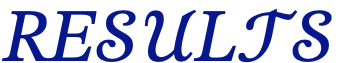

In [312]:
all_results('start')


					SUMMARIZING BBC NEWS
			Call below options from 'all_results()' function to see the results:
				About Project ========================> 'proj'
				Rouge Tables =========================> 'rouge'
				First Data ===========================> 'data1'
				Data After Summarization =============> 'data2'
				Word Cloud Plot ======================> 'wc_plot'
				Combined Word Cloud Plot =============> 'wc_combined'
				Comparative Rouge Tables =============> 'comp_rouge'
				Rouge Tables by Class ================> 'comp_rouge_class'
				Model Length Comparison ==============> 'len_model'
				Sample View ==========================> 'sample'
				Comparison of Summaries ==============> 'comp_summaries'


In [313]:
all_results('proj')


Project Idea:	1. Using news summaries for classification instead of original news.
		2. Impact of text cleaning on classification


Database:	2224 news and news summaries prepared by the BBC


Process:	1. Pre-processing.
		2. Summarizing news using four different functions in the Sumy library.
		3. Check the results using Rouge() and select the best summary
		4. Create neural network model for original news, best news summary, and clean news.


New Concepts:	1. Sumy
		2. Word Cloud
		3. Text Cleaning
		4. Rouge() 


**The dataset contains 2224 news articles and their summaries categorized into 5 different categories.**

In [314]:
all_results('data1')

,Article,Category,Summary
0,Musicians to tackle US red tape\n\nMusicians' ...,entertainment,Nigel McCune from the Musicians' Union said Br...
1,"U2's desire to be number one\n\nU2, who have w...",entertainment,But they still want more.They have to want to ...
2,Rocker Doherty in on-stage fight\n\nRock singe...,entertainment,"Babyshambles, which he formed after his acrimo..."
3,Snicket tops US box office chart\n\nThe film a...,entertainment,A Series of Unfortunate Events also stars Scot...
4,Ocean's Twelve raids box office\n\nOcean's Twe...,entertainment,"Ocean's Twelve, the crime caper sequel starrin..."
...,...,...,...
2220,Fast lifts rise into record books\n\nTwo high-...,tech,Writing a Microsoft Word document can be a dan...
2221,Nintendo adds media playing to DS\n\nNintendo ...,tech,The lifts take only 30 seconds to whisk passen...
2222,Fast moving phone viruses appear\n\nSecurity f...,tech,Nintendo is releasing an adapter for its DS ha...
2223,Hacker threat to Apple's iTunes\n\nUsers of Ap...,tech,The new strains of the Cabir mobile phone viru...


**Four different summaries were generated for each news article using Sumy functions.**

In [315]:
all_results('data2')

,LexRankS,LuhnS,LsaS,KLS
0,Musicians' groups are to tackle US visa regula...,Musicians' groups are to tackle US visa regula...,A sponsor has to make a petition on their beha...,The Musicians' Union stance is being endorsed ...
1,But such success is down to more than music. V...,"Their new album, How To Dismantle An Atomic Bo...",The group were born when Mullen put an appeal ...,"Vertigo, the first single from the new album, ..."
2,"Babyshambles played for 5,000 fans at London's...","Babyshambles played for 5,000 fans at London's...","On Tuesday, Doherty and his three bandmates we...","Babyshambles, which he formed after his acrimo..."
3,The film adaptation of Lemony Snicket novels h...,Snicket tops US box office chart The film adap...,The film adaptation of Lemony Snicket novels h...,Snicket tops US box office chart The film adap...
4,"Ocean's Twelve, the crime caper sequel starrin...",Ocean's Twelve raids box office Ocean's Twelve...,"Ocean's Twelve, the crime caper sequel starrin...","Ocean's Twelve, the crime caper sequel starrin..."
...,...,...,...,...
2220,Two high-speed lifts at the world's tallest bu...,The lifts also have a pressure control system ...,The lifts also have a pressure control system ...,The key new technologies applied in the world'...
2221,Nintendo said the media adapter will be availa...,Nintendo is releasing an adapter for its DS ha...,The add-on for the DS means people can downloa...,The release of the media add-on is an attempt ...
2222,Security firms are warning about several mobil...,Security firms are warning about several mobil...,The risk of being infected by Cabir is low bec...,Fast moving phone viruses appear Security firm...
2223,Hacker threat to Apple's iTunes Security firm ...,Users of Apple's music jukebox iTunes need to ...,Users of Apple's music jukebox iTunes need to ...,Hackers can build malicious playlist files whi...


**Rouge scores were computed for each of the 4 summarization models using Sumy functions.**


In [316]:
all_results('rouge')

   rouge-1_LexRankS  rouge-2_LexRankS  rouge-l_LexRankS
r          0.252456          0.158822          0.244312
p          0.510537          0.352892          0.492934
f          0.328268          0.212427          0.317513

   rouge-1_LuhnS  rouge-2_LuhnS  rouge-l_LuhnS
r       0.268064       0.175072       0.259940
p       0.512124       0.364079       0.495594
f       0.342647       0.229576       0.332127

   rouge-1_LsaS  rouge-2_LsaS  rouge-l_LsaS
r      0.276478      0.160650      0.263908
p      0.412474      0.262097      0.392962
f      0.322973      0.193907      0.308171

   rouge-1_KLS  rouge-2_KLS  rouge-l_KLS
r     0.239707     0.130511     0.228119
p     0.406268     0.244748     0.386419
f     0.293884     0.165644     0.279730


**Comparison of Rouge scores across different summarization models shows LuhnS performing best.**


In [317]:
all_results('comp_rouge')

,rouge-1_LexRankS,rouge-2_LexRankS,rouge-l_LexRankS,rouge-1_LuhnS,rouge-2_LuhnS,rouge-l_LuhnS,rouge-1_LsaS,rouge-2_LsaS,rouge-l_LsaS,rouge-1_KLS,rouge-2_KLS,rouge-l_KLS
r,0.252456,0.158822,0.244312,0.268064,0.175072,0.259940,0.276478,0.160650,0.263908,0.239707,0.130511,0.228119
p,0.510537,0.352892,0.492934,0.512124,0.364079,0.495594,0.412474,0.262097,0.392962,0.406268,0.244748,0.386419
f,0.328268,0.212427,0.317513,0.342647,0.229576,0.332127,0.322973,0.193907,0.308171,0.293884,0.165644,0.279730


**Rouge scores for LuhnS across different categories indicate its best performance in sports.**


In [318]:
all_results('comp_rouge_class')

,rouge-1_pol,rouge-2_pol,rouge-l_pol,rouge-1_ent,rouge-2_ent,rouge-l_ent,rouge-1_bus,rouge-2_bus,rouge-l_bus,rouge-1_sport,rouge-2_sport,rouge-l_sport,rouge-1_tech,rouge-2_tech,rouge-l_tech
r,0.423610,0.300245,0.413326,0.432477,0.315631,0.422253,0.129495,0.011396,0.112424,0.259143,0.145992,0.246874,0.114771,0.008178,0.101304
p,0.606434,0.489703,0.592313,0.608103,0.494738,0.593724,0.220666,0.024343,0.192247,0.386607,0.243861,0.368630,0.210868,0.019773,0.186822
f,0.490908,0.364761,0.479254,0.496096,0.375982,0.484376,0.157807,0.014858,0.137156,0.300688,0.175774,0.286644,0.143647,0.011088,0.126956


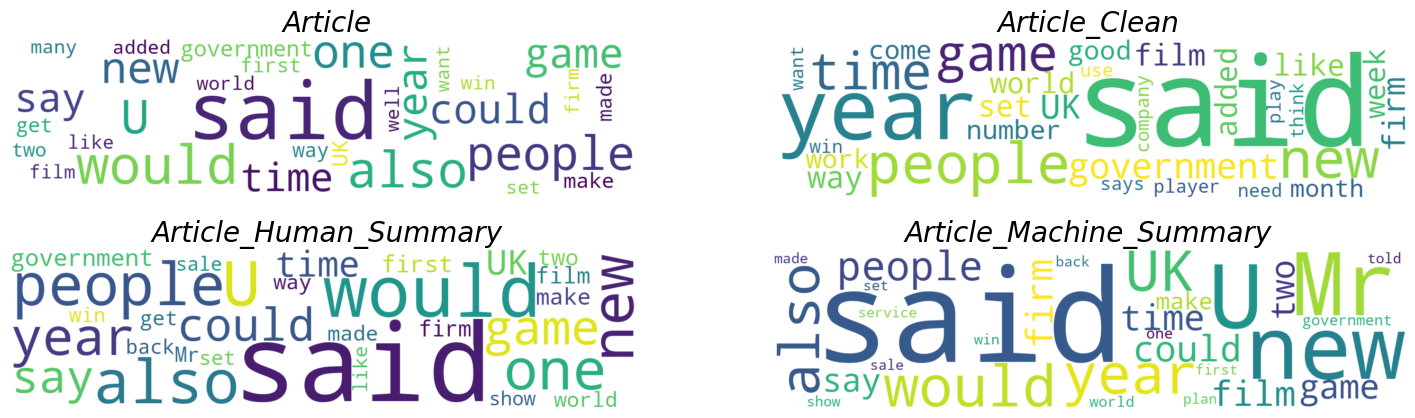

In [319]:
all_results('wc_plot')

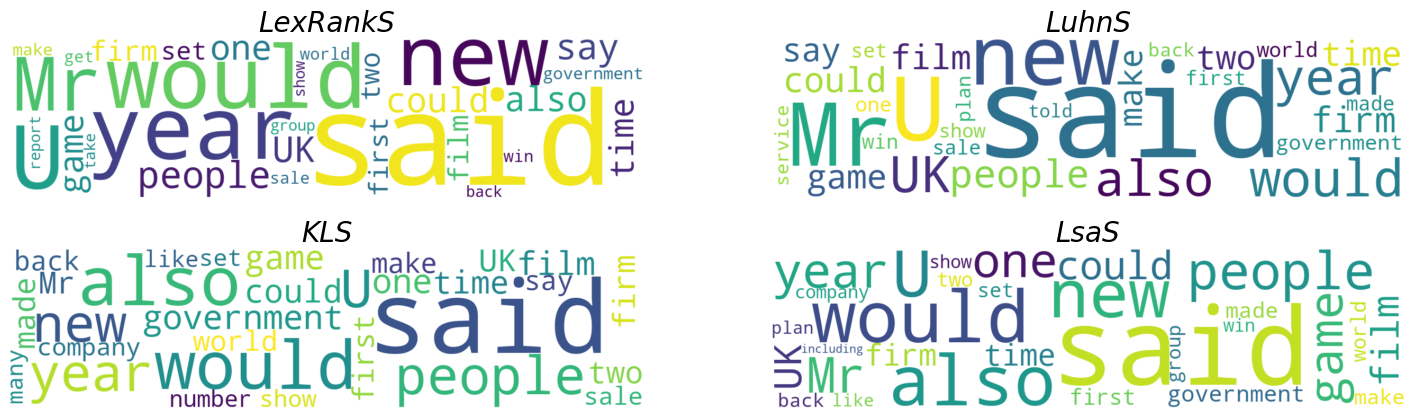

In [320]:
all_results('wc_combined')

**The average length of summaries generated by each model compared to the original articles was computed.**
 

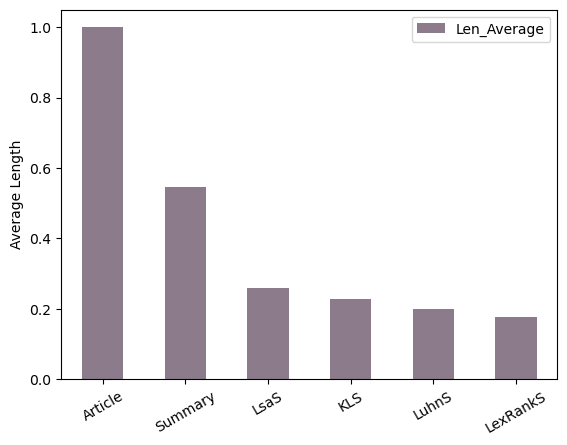

(   Article  Category  Summary  \
 0     2260       1.0      991   
 1     4810       1.0     2147   
 2     2126       1.0      874   
 3     1044       1.0      434   
 4     1581       1.0      799   
 
                                                Clean  LexRankS  LuhnS  LsaS  \
 0  Musicians tackle red tapeMusicians groups tack...       380    360   597   
 1  desire number oneU prestigious Grammy Awards h...       295    426   687   
 2  Rocker Doherty onstage fightRock singer Pete D...       280    354   476   
 3  Snicket tops box office chartThe film adaptati...       321    243   345   
 4  Oceans raids box officeOceans crime caper sequ...       450    341   442   
 
    KLS  
 0  601  
 1  632  
 2  463  
 3  291  
 4  415  ,
 None)

In [321]:
all_results('len_model')

In [322]:
all_results('sample')

Sample text was summarized using 4 different summarization models:

				______________. Original Text .______________

 The Seoul Southern District Prosecutors' Office said it would work with Serbia to detain him.
Mr Kwon, 31, was charged with fraud and breaches of capital markets law after the tokens imploded in May.
In September Interpol issued an international warrant for his arrest.
The following month, South Korean prosecutors said he had travelled via Dubai to an unknown country after leaving Singapore, where his company Terraform had its headquarters.
The Interpol "Red Notice" is a request to law enforcement worldwide to locate and provisionally arrest a person pending extradition, surrender, or similar legal action.
South Korea and Serbia do not have an extradition treaty but in the past both have agreed to requests under the European Convention on Extradition.
				______________. Summary by LsaS .______________

 Mr Kwon, 31, was charged with fraud and breaches of capital mark

In [323]:
all_results('comp_summaries')

Manual comparison of summaries generated for sample text indicates differences in results.

						Summary by LsaS


The Seoul Southern District Prosecutors' Office said it would work with Serbia to detain him.Mr Kwon, 31, was charged with fraud and breaches of capital markets law after the tokens imploded in May.In September Interpol issued an international warrant for his arrest.The following month, South Korean prosecutors said he had travelled via Dubai to an unknown country after leaving Singapore, where his company Terraform had its headquarters. The Interpol "Red Notice" is a request to law enforcement worldwide to locate and provisionally arrest a person pending extradition, surrender, or similar legal action.South Korea and Serbia do not have an extradition treaty but in the past both have agreed to requests under the European Convention on Extradition.
						Summary by LuhnS


The Seoul Southern District Prosecutors' Office said it would work with Serbia to detain him.Mr Kwon,

(None, None, None, None)